In [1]:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py#L22-L23

In [2]:
!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch 
!pip install torchvision
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

Found existing installation: torch 1.7.0
Uninstalling torch-1.7.0:
  Successfully uninstalled torch-1.7.0
Found existing installation: torchvision 0.8.1
Uninstalling torchvision-0.8.1:
  Successfully uninstalled torchvision-0.8.1
     |████████████████████████████████| 831.4 MB 2.0 kB/s  eta 0:00:01    |██▋                             | 68.1 MB 36.9 MB/s eta 0:00:21     |█████▉                          | 150.3 MB 36.1 MB/s eta 0:00:19     |██████▎                         | 162.0 MB 36.1 MB/s eta 0:00:190.2 MB/s eta 0:00:22     |██████▋                         | 172.4 MB 30.2 MB/s eta 0:00:22     |██████▋                         | 173.0 MB 30.2 MB/s eta 0:00:22     |██████▊                         | 174.7 MB 30.2 MB/s eta 0:00:22     |██████▊                         | 175.2 MB 30.2 MB/s eta 0:00:22     |██████▊                         | 175.7 MB 30.2 MB/s eta 0:00:22     |██████▉                         | 176.7 MB 30.2 MB/s eta 0:00:22     |██████▉                         | 177.6 MB 30.

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [5]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [6]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [7]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [8]:
print(x_train.shape, y_train.shape)

(15, 1) (15, 1)


In [10]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.2940
Epoch [10/60], Loss: 0.2936
Epoch [15/60], Loss: 0.2933
Epoch [20/60], Loss: 0.2930
Epoch [25/60], Loss: 0.2927
Epoch [30/60], Loss: 0.2924
Epoch [35/60], Loss: 0.2920
Epoch [40/60], Loss: 0.2917
Epoch [45/60], Loss: 0.2914
Epoch [50/60], Loss: 0.2911
Epoch [55/60], Loss: 0.2908
Epoch [60/60], Loss: 0.2905


In [11]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
print(predicted, predicted.shape)

[[1.0994611]
 [1.5376526]
 [1.9758439]
 [2.4578543]
 [2.5454926]
 [1.4452341]
 [3.6804085]
 [2.2475226]
 [2.8084075]
 [0.6481241]
 [2.5901084]
 [4.0835447]
 [1.9013515]
 [2.9705384]
 [1.0197899]] (15, 1)


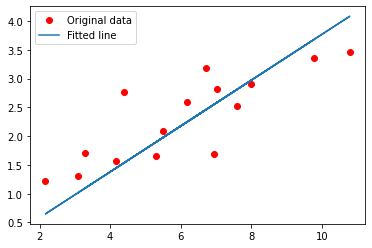

In [12]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [13]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')